<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exmplo-1" data-toc-modified-id="Exmplo-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exmplo 1</a></span></li><li><span><a href="#Exemplo-2" data-toc-modified-id="Exemplo-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exemplo 2</a></span></li></ul></div>

In [2]:
#! pip install tslearn

     |████████████████████████████████| 773 kB 5.5 MB/s eta 0:00:01


In [17]:
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import TimeSeriesCentroidBasedClusteringMixin
from tslearn.utils import to_time_series_dataset


#### Exmplo 1

In [9]:
X = random_walks(n_ts=50, sz=32, d=1)


In [10]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0).fit(X)

In [11]:
km.cluster_centers_.shape

(3, 32, 1)

In [12]:
km_dba = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5, max_iter_barycenter=5,
                          random_state=0).fit(X)

In [13]:
km_dba.cluster_centers_.shape

(3, 32, 1)

In [14]:
km_sdtw = TimeSeriesKMeans(n_clusters=3, metric="softdtw", max_iter=5,
                           max_iter_barycenter=5,
                           metric_params={"gamma": .5},
                           random_state=0).fit(X)

In [15]:
km_sdtw.cluster_centers_.shape

(3, 32, 1)

In [18]:
X_bis = to_time_series_dataset([[1, 2, 3, 4],
                                [1, 2, 3],
                                [2, 5, 6, 7, 8, 9]])

In [19]:
X_bis

array([[[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [nan],
        [nan]],

       [[ 1.],
        [ 2.],
        [ 3.],
        [nan],
        [nan],
        [nan]],

       [[ 2.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.]]])

In [20]:
km = TimeSeriesKMeans(n_clusters=2, max_iter=5,
                       metric="dtw", random_state=0).fit(X_bis)
km.cluster_centers_.shape

(2, 6, 1)

#### Exemplo 2

- se eu tenho uma serie que pode ser clusterizada em varias outras, posso usar 
uma ou mais variaveis para encontrar clusters. Posso criar uma serie para cada produto por exemplo

In [22]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

In [26]:
# carregando dataset e criando dataset de treino e test

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)


In [41]:
y_train # classes 

array([1, 2, 4, 3, 1, 4, 4, 1, 1, 4, 4, 4, 4, 3, 4, 1, 3, 2, 4, 4, 4, 4,
       3, 2, 1, 2, 4, 4, 2, 4, 1, 1, 4, 4, 2, 1, 1, 2, 1, 1, 3, 3, 3, 3,
       3, 1, 4, 4, 4, 2, 4, 3, 2, 1, 4, 2, 2, 2, 2, 1, 3, 2, 4, 3, 3, 2,
       2, 1, 4, 4, 2, 3, 2, 1, 3, 4, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 4, 1,
       2, 1, 4, 4, 4, 1, 3, 1, 2, 4, 1, 2])

In [39]:
X_train.shape # 69 series, com 275 linhas e 1 coluna

(69, 275, 1)

In [32]:
# Resampler: deixa as series do mesmo tamanho mas inclui distorções temporais

In [24]:
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

In [36]:
X_train.shape

(69, 275, 1)

Euclidean k-means
108.287 --> 57.972 --> 56.350 --> 56.151 --> 56.151 --> 


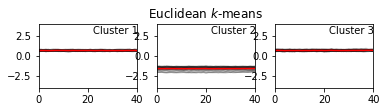

In [29]:
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")



DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.7s finished


1.243 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.6s finished


0.597 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.7s finished


0.597 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.7s finished


1.348 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.7s finished


0.573 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.6s finished


0.573 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.6s finished


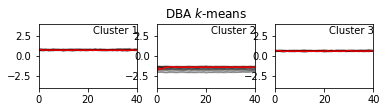

In [30]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")



Soft-DTW k-means
11.551 --> 9.566 --> 9.580 --> 9.574 --> 9.583 --> 9.581 --> 9.585 --> 9.585 --> 9.588 --> 9.589 --> 9.591 --> 9.593 --> 9.594 --> 9.596 --> 9.597 --> 9.597 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.598 --> 9.597 --> 9.597 --> 9.597 --> 9.597 --> 9.597 --> 9.597 --> 9.597 --> 9.597 --> 9.597 --> 9.596 --> 9.596 --> 9.596 --> 9.596 --> 9.596 --> 


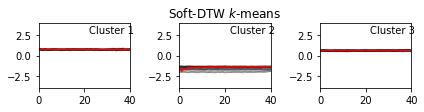

In [31]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()